In [119]:
import pandas as pd
import numpy as np

In [120]:
heart_data = pd.read_csv('heart_data_clean.csv')

Because the outcome variable (target) is binary, I'm going to use a logistic regression.

First, I will split the data into two sets: the target variable and the predictors/features

In [121]:
features = ['age', 'sex', 'cp', 'fbs', 'trestbps', 'chol', 
           'restecg', 'thalach', 'exang', 'oldpeak', 
           'slope', 'ca', 'thal']

X = heart_data[features]
y = heart_data['target']

The next step is to split the data into training and testing datasets

Logistic regression will use scikit learn:

> train_test_split

> LogisticRegression

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
#using train test split to train; 
#test size = 1/4 of the data will be used to test (3/4 for training)
#random_state = select test data randomly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
reg = LogisticRegression()

#fit the model with training data
reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
#predict y (target) using test data
y_predict = reg.predict(X_test)

Now I need to evaluate the model.

To do this, I'll use a confusion matrix to compare the predictions (y_predict) to the test data (y_test)

In [127]:
from sklearn import metrics

In [128]:
conf_matrix = metrics.confusion_matrix(y_test, y_predict)
conf_matrix

array([[34,  1],
       [ 3, 33]])

34 and 33 are accurate predictions (0, 1)
1 and 3 are inaccurate predictions (0, 1)

Seems pretty accurate, but let's visualize this matrix.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted')

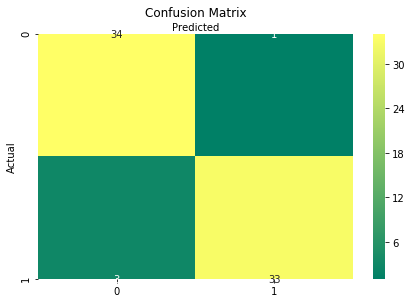

In [130]:
#Using a heatmap to visualize the confusion matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix),
           annot = True, cmap = 'summer')

ax.xaxis.set_label_position('top')

plt.tight_layout()

plt.title("Confusion Matrix", y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

To better evaluate the model, I'm going to use accuracy, precision, and recall; 

In [131]:
print("accuracy: ", metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test, y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))

accuracy:  0.9436619718309859
precision:  0.9705882352941176
recall:  0.9166666666666666


Accuracy is 94%.

A precision rate of .97 means that when the model predicts that someone has heart disease, they have it 97% of the time. That is, very few (3%) false positives.

Recall .92 = Those with heart diease in the data set are identified 92% of the time. That is, 8% false negatives

ROC curve to explore accuracy (true/false positives)

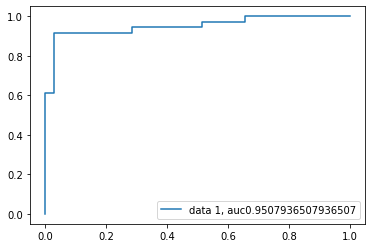

In [132]:
y_pred_prob = reg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = "data 1, auc"+str(auc))
plt.legend(loc=4)
plt.show()

auc is .95, so it's a good classifier (1 is perfect)

Conclusion: The accuracy of this model is pretty high with all the variables as features. However, some features didn't seem like they would be very predictive based on the exploratory data analysis, so I will run a logistic regression analysis to see the p-values/coefficients associated with each feature.

In [133]:
import statsmodels.formula.api as smf

In [134]:
model = smf.logit(
    formula="target ~ age + fbs + \
    sex + cp + trestbps + chol+ restecg + \
                  thalach + exang + oldpeak + \
                  slope + ca + thal", data = heart_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.324926
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  283
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                           13
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.5266
Time:                        17:38:31   Log-Likelihood:                -91.954
converged:                       True   LL-Null:                       -194.23
Covariance Type:            nonrobust   LLR p-value:                 1.583e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7992      3.046     -1.576      0.115     -10.769       1.170
age           -0.0092      0.025     -0.365      0.715      -0.058       0.040
fbs           -0.4602      0.592     -0.777      0.437      -1.621       0.700
sex            1.8029      0.504      3.579      0.000       0.816       2.790
cp            -0.7902      0.197     -4.015      0.000      -1.176      -0.404
trestbps       0.0247      0.013      1.921      0.055      -0.000       0.050
chol           0.0081      0.005      1.646      0.100      -0.002       0.018
restecg       -0.5297      0.381     -1.391      0.164      -1.276       0.217
thalach       -0.0232      0.012     -2.009      0.045      -0.046      -0.001
exang          0.8211      0.446      1.839      0.066      -0.054       1.696
oldpeak        0.5738      0.239      2.397      0.017       0.105       1.043
slope         -0.7546      0.373     -2.021      0.043      -1.486      -0.023
ca             1.2650      0.279      4.533      0.000       0.718       1.812
thal           1.1812      0.327      3.610      0.000       0.540       1.822
==============================================================================
"""

With all features the psuedo-R-square is ~.53

I'm going to run this analysis again dropping everything with p > .05 (age, fbs, chol, trestbps, restecg, exang)

In [140]:
model = smf.logit(
    formula="target ~ \
    sex + cp + thalach + oldpeak + \
                  slope + ca + thal", data = heart_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.349566
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  283
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            7
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:                  0.4907
Time:                        17:44:20   Log-Likelihood:                -98.927
converged:                       True   LL-Null:                       -194.23
Covariance Type:            nonrobust   LLR p-value:                 1.115e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1331      1.582      0.084      0.933      -2.969       3.235
sex            1.5630      0.447      3.497      0.000       0.687       2.439
cp            -0.8259      0.180     -4.576      0.000      -1.180      -0.472
thalach       -0.0246      0.010     -2.549      0.011      -0.044      -0.006
oldpeak        0.6422      0.220      2.915      0.004       0.210       1.074
slope         -0.7090      0.348     -2.037      0.042      -1.391      -0.027
ca             1.1911      0.249      4.782      0.000       0.703       1.679
thal           1.1670      0.301      3.882      0.000       0.578       1.756
==============================================================================
"""

R-squared is about the same, let's test the model again to see if it's better or worse.

In [144]:
features = ['sex', 'cp', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

X = heart_data[features]
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

reg = LogisticRegression()

#fit the model with training data
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

print("accuracy: ", metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test, y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))

accuracy:  0.9154929577464789
precision:  0.96875
recall:  0.8611111111111112


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy isn't better, so the best option is to keep all the features.

Just for funsies, checking the accuracy of naive bayes and k-neighbors

In [145]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_train, y_train).predict(X_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test, pred, normalize = True))

Naive-Bayes accuracy :  0.8873239436619719


In [146]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(X_train, y_train)
# predict the response
pred = neigh.predict(X_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.7887323943661971


Neither is better than the logistic regression.